# Imports

In [12]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,Ridge,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
plt.style.use('seaborn-paper')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-12-0e2a0ea62a5b>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


# Data Cleaning

source: https://www.kaggle.com/datasets/joelljungstrom/128k-airline-reviews

In [13]:
df = pd.read_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline rating/AirlineReviews.csv')
df

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129450,NaN,Wizz Air,Economy Class,NaN,15th July 2010,0,0,0,UnitedKingdom,NaN,...,NaN,0,0,wizz-air,Wizz Air customer review,NaN,NaN,1,0,7889c410-59a0-4a11-9af6-a100c5ebb03e
129451,NaN,Wizz Air,Economy Class,NaN,23rd June 2010,0,0,0,Belgium,8.0,...,NaN,0,0,wizz-air,Wizz Air customer review,NaN,NaN,4,0,dc7700d9-69e3-4296-93a5-0a550e8b8a80
129452,NaN,Wizz Air,Economy Class,NaN,19th June 2010,0,0,0,Ireland,NaN,...,NaN,0,0,wizz-air,Wizz Air customer review,NaN,NaN,1,0,6de9ac64-a533-4dc8-b555-a16cc13554f7
129453,NaN,Wizz Air,Economy Class,NaN,16th June 2010,0,0,0,CzechRepublic,5.0,...,NaN,0,0,wizz-air,Wizz Air customer review,NaN,NaN,4,0,52ad5aa9-88f6-4eb1-99fe-e7fa64223792


In [14]:
df.describe()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
count,129455.000000,129455.000000,129455.000000,125124.000000,129455.000000,129455.000000,129455.000000,129455.000000
mean,1.557190,1.989077,1.652010,4.556408,2.470202,2.689622,2.637527,0.453926
std,1.751076,1.774512,1.740252,3.498833,1.620262,1.774499,1.628808,1.078274
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,4.000000,3.000000,8.000000,4.000000,4.000000,4.000000,0.000000
max,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36424 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

In [16]:
for column in df.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {df[column].nunique()}\n"+'-'*20)

Unique values in Aircraft: 3633
--------------------
Unique values in AirlineName: 547
--------------------
Unique values in CabinType: 4
--------------------
Unique values in DateFlown: 111
--------------------
Unique values in DatePub: 5200
--------------------
Unique values in OriginCountry: 202
--------------------
Unique values in Recommended: 2
--------------------
Unique values in Review: 128425
--------------------
Unique values in Route: 51401
--------------------
Unique values in Slug: 548
--------------------
Unique values in Title: 70975
--------------------
Unique values in TravelType: 4
--------------------
Unique values in TripVerified: 6
--------------------
Unique values in unique_id: 129455
--------------------


In [17]:
drop_cols = [
    'Aircraft',
    'AirlineName',
    'DateFlown',
    'DatePub',
    'OriginCountry',
    'Review',
    'Route',
    'Slug',
    'Title',
    'unique_id',
    'TripVerified'
]

df_clean = df.drop(drop_cols,axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CabinType            126437 non-null  object 
 1   EntertainmentRating  129455 non-null  int64  
 2   FoodRating           129455 non-null  int64  
 3   GroundServiceRating  129455 non-null  int64  
 4   OverallScore         125124 non-null  float64
 5   Recommended          129455 non-null  object 
 6   SeatComfortRating    129455 non-null  int64  
 7   ServiceRating        129455 non-null  int64  
 8   TravelType           91146 non-null   object 
 9   ValueRating          129455 non-null  int64  
 10  WifiRating           129455 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 10.9+ MB


In [18]:
for c in df_clean.columns:
  print(f'Column {c} vals\n{df[c].value_counts()}')
  print('-'*20)

Column CabinType vals
Economy Class      102735
Business Class      16474
Premium Economy      4816
First Class          2412
Name: CabinType, dtype: int64
--------------------
Column EntertainmentRating vals
0    54120
1    26973
4    14071
3    13327
5    12140
2     8824
Name: EntertainmentRating, dtype: int64
--------------------
Column FoodRating vals
0    36314
1    29679
4    18044
3    16937
5    15956
2    12525
Name: FoodRating, dtype: int64
--------------------
Column GroundServiceRating vals
1    42536
0    41649
5    15527
4    12323
3     9558
2     7862
Name: GroundServiceRating, dtype: int64
--------------------
Column OverallScore vals
1.0     44070
10.0    14582
9.0     12512
2.0     12228
8.0     11754
3.0      7769
7.0      7589
5.0      5396
4.0      4812
6.0      4412
Name: OverallScore, dtype: int64
--------------------
Column Recommended vals
no     77597
yes    51858
Name: Recommended, dtype: int64
--------------------
Column SeatComfortRating vals
1    34079
4

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CabinType            126437 non-null  object 
 1   EntertainmentRating  129455 non-null  int64  
 2   FoodRating           129455 non-null  int64  
 3   GroundServiceRating  129455 non-null  int64  
 4   OverallScore         125124 non-null  float64
 5   Recommended          129455 non-null  object 
 6   SeatComfortRating    129455 non-null  int64  
 7   ServiceRating        129455 non-null  int64  
 8   TravelType           91146 non-null   object 
 9   ValueRating          129455 non-null  int64  
 10  WifiRating           129455 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 10.9+ MB


In [20]:
for c in df_clean.select_dtypes(include='object').columns:
  print(c)
  print(df[c].value_counts())
  print(df[c].unique())
  print(df[c].isna().sum())
  print('-'*20)

CabinType
Economy Class      102735
Business Class      16474
Premium Economy      4816
First Class          2412
Name: CabinType, dtype: int64
['Economy Class' nan 'Business Class' 'First Class' 'Premium Economy']
3018
--------------------
Recommended
no     77597
yes    51858
Name: Recommended, dtype: int64
['yes' 'no']
0
--------------------
TravelType
Solo Leisure      33246
Couple Leisure    23845
Family Leisure    19900
Business          14155
Name: TravelType, dtype: int64
['Solo Leisure' nan 'Business' 'Couple Leisure' 'Family Leisure']
38309
--------------------


In [21]:
df_clean['CabinType'] = df_clean['CabinType'].fillna('Economy Class')
df_clean['Recommended'] = df_clean['Recommended'].replace({'yes':1,'no':0}).astype(int)

In [22]:
categorical_cols = df_clean.select_dtypes(include='object').columns
dummies = pd.get_dummies(df_clean[categorical_cols],prefix=categorical_cols)
df_clean = pd.concat([df_clean,dummies],axis=1)
df_clean

,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TravelType,ValueRating,WifiRating,CabinType_Business Class,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure
0,Economy Class,0,4,4,9.0,1,4,5,Solo Leisure,3,0,0,1,0,0,0,0,0,1
1,Economy Class,0,1,1,1.0,0,2,2,Solo Leisure,2,0,0,1,0,0,0,0,0,1
2,Economy Class,0,1,1,1.0,0,2,1,Solo Leisure,2,0,0,1,0,0,0,0,0,1
3,Economy Class,0,0,0,8.0,1,0,0,NaN,4,0,0,1,0,0,0,0,0,0
4,Economy Class,0,0,0,1.0,0,0,0,NaN,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129450,Economy Class,0,0,0,NaN,0,0,0,NaN,1,0,0,1,0,0,0,0,0,0
129451,Economy Class,0,0,0,8.0,1,0,0,NaN,4,0,0,1,0,0,0,0,0,0
129452,Economy Class,0,0,0,NaN,0,0,0,NaN,1,0,0,1,0,0,0,0,0,0
129453,Economy Class,0,0,0,5.0,1,0,0,NaN,4,0,0,1,0,0,0,0,0,0


In [23]:
df_final = df_clean.dropna(how='any').drop(categorical_cols,axis=1)
df_final

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,ValueRating,WifiRating,CabinType_Business Class,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure
0,0,4,4,9.0,1,4,5,3,0,0,1,0,0,0,0,0,1
1,0,1,1,1.0,0,2,2,2,0,0,1,0,0,0,0,0,1
2,0,1,1,1.0,0,2,1,2,0,0,1,0,0,0,0,0,1
6,0,1,1,2.0,0,1,3,1,0,0,1,0,0,1,0,0,0
7,0,0,5,9.0,1,4,4,4,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129200,0,0,2,8.0,1,1,1,5,0,0,1,0,0,0,0,0,1
129201,1,1,1,1.0,0,1,2,1,1,0,1,0,0,0,0,1,0
129202,0,0,2,1.0,0,2,1,2,0,0,1,0,0,0,0,0,1
129203,0,0,1,1.0,0,2,2,1,0,0,1,0,0,0,1,0,0


In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91145 entries, 0 to 129204
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EntertainmentRating        91145 non-null  int64  
 1   FoodRating                 91145 non-null  int64  
 2   GroundServiceRating        91145 non-null  int64  
 3   OverallScore               91145 non-null  float64
 4   Recommended                91145 non-null  int64  
 5   SeatComfortRating          91145 non-null  int64  
 6   ServiceRating              91145 non-null  int64  
 7   ValueRating                91145 non-null  int64  
 8   WifiRating                 91145 non-null  int64  
 9   CabinType_Business Class   91145 non-null  uint8  
 10  CabinType_Economy Class    91145 non-null  uint8  
 11  CabinType_First Class      91145 non-null  uint8  
 12  CabinType_Premium Economy  91145 non-null  uint8  
 13  TravelType_Business        91145 non-null  ui

In [25]:
df_final.to_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline rating/clean_rating.csv')

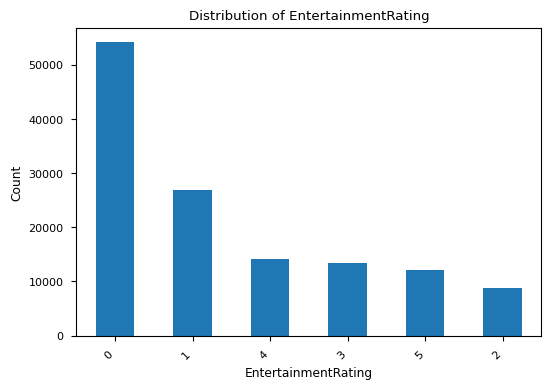

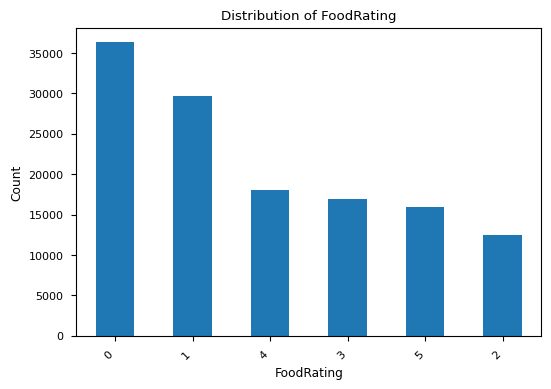

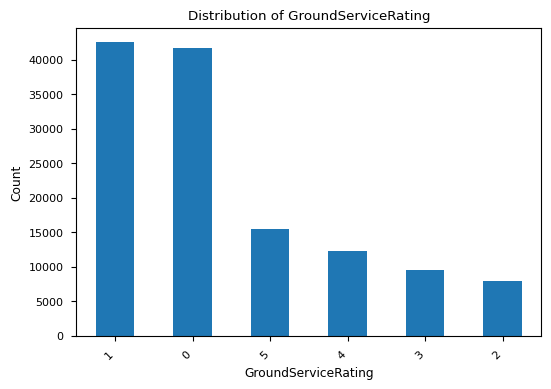

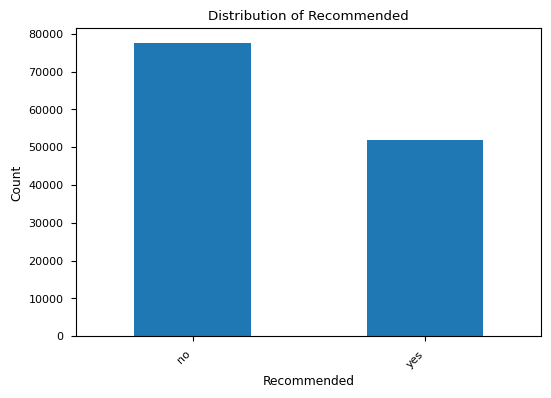

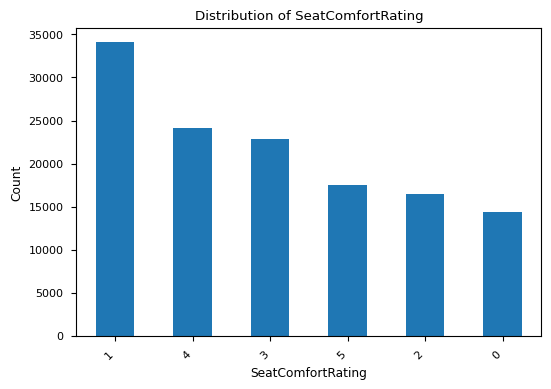

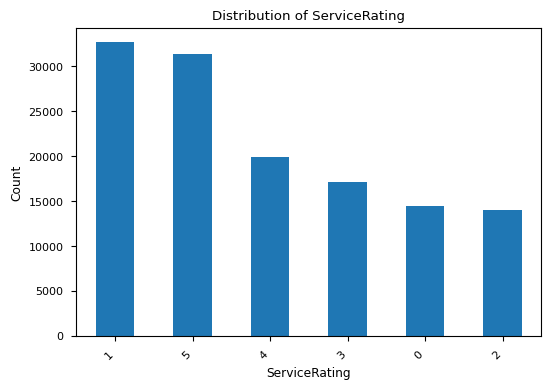

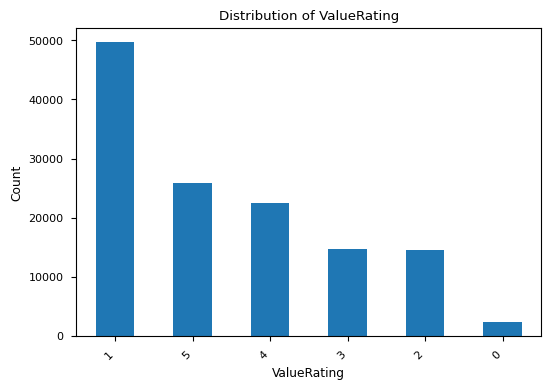

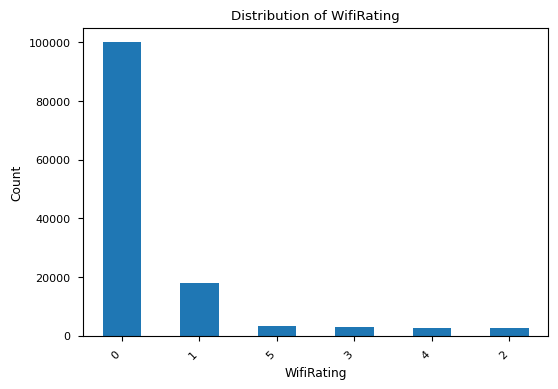

In [26]:
for column in df_final.columns:
    if df_final[column].dtype == 'uint8' or column =='OverallScore':
        continue
    plt.figure(figsize=(6, 4))
    plt.title(f'Distribution of {column}')
    df[column].value_counts().plot(kind='bar')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

<ipython-input-27-dfb31dd6ed44>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


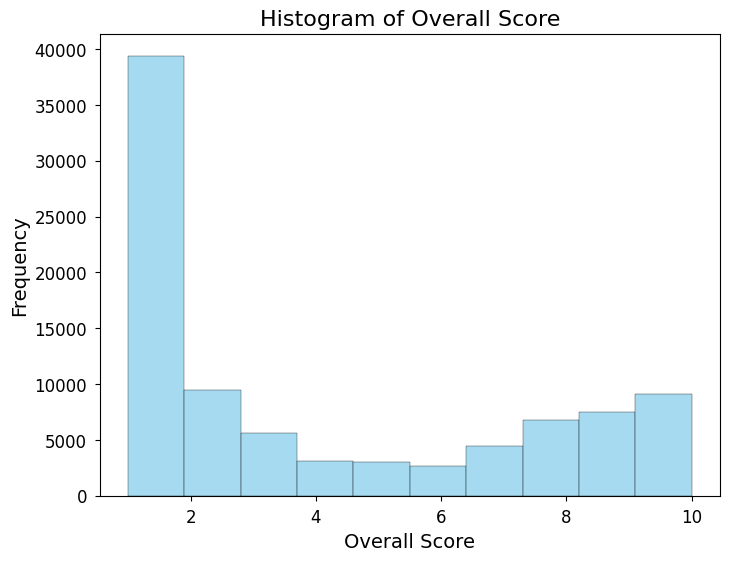

In [27]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.style.use('seaborn-paper')
sns.histplot(data=df_final, x='OverallScore', bins=10, color='skyblue')
plt.xlabel('Overall Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Overall Score', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Prediction Models

## Train test split

In [28]:
ratings = pd.read_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline rating/clean_rating.csv',index_col=0)
ratings.head()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,ValueRating,WifiRating,CabinType_Business Class,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure
0,0,4,4,9.0,1,4,5,3,0,0,1,0,0,0,0,0,1
1,0,1,1,1.0,0,2,2,2,0,0,1,0,0,0,0,0,1
2,0,1,1,1.0,0,2,1,2,0,0,1,0,0,0,0,0,1
6,0,1,1,2.0,0,1,3,1,0,0,1,0,0,1,0,0,0
7,0,0,5,9.0,1,4,4,4,0,0,1,0,0,0,0,0,1


In [29]:
X = ratings.drop(['OverallScore'],axis=1)
y = ratings['OverallScore']

# train_ratio = 0.75
# validation_ratio = 0.15
# test_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=476)

# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),random_state=476)
X_train.shape,X_test.shape

((72916, 16), (18229, 16))

### Saving individual sets if needed

In [30]:
train = pd.concat([X_train,y_train],axis=1)
train.to_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline rating/train.csv')
train

,EntertainmentRating,FoodRating,GroundServiceRating,Recommended,SeatComfortRating,ServiceRating,ValueRating,WifiRating,CabinType_Business Class,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure,OverallScore
119690,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,2.0
11498,1,1,3,0,2,1,1,1,0,1,0,0,0,0,0,1,1.0
67138,0,4,5,1,5,5,5,0,0,1,0,0,0,0,1,0,10.0
113027,0,0,2,1,3,1,4,0,0,1,0,0,0,0,0,1,5.0
36223,1,1,1,0,1,2,1,1,0,1,0,0,0,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124876,0,0,3,0,3,1,2,0,0,1,0,0,1,0,0,0,2.0
125418,0,4,4,1,4,5,4,0,0,1,0,0,0,0,0,1,8.0
21034,4,4,4,1,3,4,4,3,0,1,0,0,0,0,1,0,7.0
115159,1,1,2,0,1,1,1,1,0,1,0,0,1,0,0,0,1.0


In [31]:
test = pd.concat([X_test,y_test],axis=1)
test.to_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline rating/test.csv')
test

,EntertainmentRating,FoodRating,GroundServiceRating,Recommended,SeatComfortRating,ServiceRating,ValueRating,WifiRating,CabinType_Business Class,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure,OverallScore
35707,0,0,4,1,5,5,5,0,0,1,0,0,0,0,0,1,9.0
17040,1,1,3,0,1,2,3,1,0,1,0,0,0,1,0,0,5.0
28846,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1.0
65393,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1.0
13764,0,4,4,1,4,5,4,0,0,1,0,0,0,1,0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,4,4,5,1,3,4,5,0,0,1,0,0,0,1,0,0,7.0
128846,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1.0
111475,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1.0
36473,0,1,3,0,2,1,2,1,0,1,0,0,0,0,0,1,3.0


### Scaling Variables for Models

In [32]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std.shape,X_test_std.shape,y_train.shape,y_test.shape

((72916, 16), (18229, 16), (72916,), (18229,))

Naive Model (Mean as prediction)

In [33]:
yhat = y_train.mean()
mean_squared_error(y_train,[yhat]*len(y_train)),mean_squared_error(y_test,[yhat]*len(y_test)),yhat

(11.784781388916532, 11.834853648041328, 3.980799824455538)

## Linear Regression

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)


yhat_train = lr.predict(X_train_poly)
yhat_test = lr.predict(X_test_poly)


lr_mse_train = mean_squared_error(y_train, yhat_train)
lr_mse_test = mean_squared_error(y_test, yhat_test)

print("MSE on training data LR:", lr_mse_train)
print("MSE on testing data LR:", lr_mse_test)


In [ ]:
cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

### Lasso

In [ ]:
alphas = np.logspace(-5, 0, num=50)
lasso = LassoCV(alphas=alphas,random_state=476,cv=5).fit(X_train_std,y_train)
yhat_train_lasso = lasso.predict(X_train_std)
yhat_test_lasso = lasso.predict(X_test_std)

mse_train_lasso = mean_squared_error(y_train,yhat_train_lasso)
mse_test_lasso = mean_squared_error(y_test,yhat_test_lasso)

In [ ]:
lasso_mse_scores = []
for a in alphas:
  lasso = Lasso(alpha=a)
  lasso.fit(X_train,y_train)
  yhat = lasso.predict(X_test)
  lasso_mse_scores.append(mean_squared_error(y_test,yhat))

In [ ]:
mse_train_lasso,mse_test_lasso

In [ ]:
lasso_mse_scores

In [ ]:
np.argmin(lasso_mse_scores)

In [ ]:
plt.plot(alphas,lasso_mse_scores)
plt.xscale('log')

### Ridge

In [ ]:
ridge = RidgeCV(alphas = alphas,cv=5).fit(X_train_std,y_train)
yhat_train_ridge = ridge.predict(X_train_std)

yhat_train_ridge = ridge.predict(X_train_std)
yhat_test_ridge = ridge.predict(X_test_std)

mse_train_ridge = mean_squared_error(y_train,yhat_train_ridge)
mse_test_ridge = mean_squared_error(y_test,yhat_test_ridge)

In [ ]:
mse_train_ridge,mse_test_ridge

In [ ]:
ridge_mse = []

for i, a in enumerate(alphas):
  model = Ridge(alpha=a)
  model.fit(X_train, y_train)
  yhat = model.predict(X_test)
  ridge_mse.append(mean_squared_error(y_test,yhat))

ridge_mse

In [ ]:
plt.plot(alphas,ridge_mse)
plt.xscale('log')

In [ ]:
np.argmin(ridge_mse)

## KNN

In [ ]:

cv_scores = []
for i in range(1,50):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  cv_scores.append(scores.mean())
cv_scores

best_k = k_values[np.argmax(cv_scores)]

# Print the results
print("Cross-Validation Scores for Each k:", cv_scores)
print("Best k:", best_k)

## Ensemble Methods

## Single Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
mse_dt_test = mean_squared_error(y_test,y_pred)
mse_dt_test

### Random Forest

In [23]:
rf = RandomForestRegressor()

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
}

# Create GridSearchCV instance for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_estimator_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Best Parameters for Random Forest Regression: {best_params_rf}")
print(f"Mean Squared Error on Test Set: {mse_rf}")

Best Parameters for Random Forest Regression: {'max_depth': 10, 'n_estimators': 200}
Mean Squared Error on Test Set: 0.8596051248929382


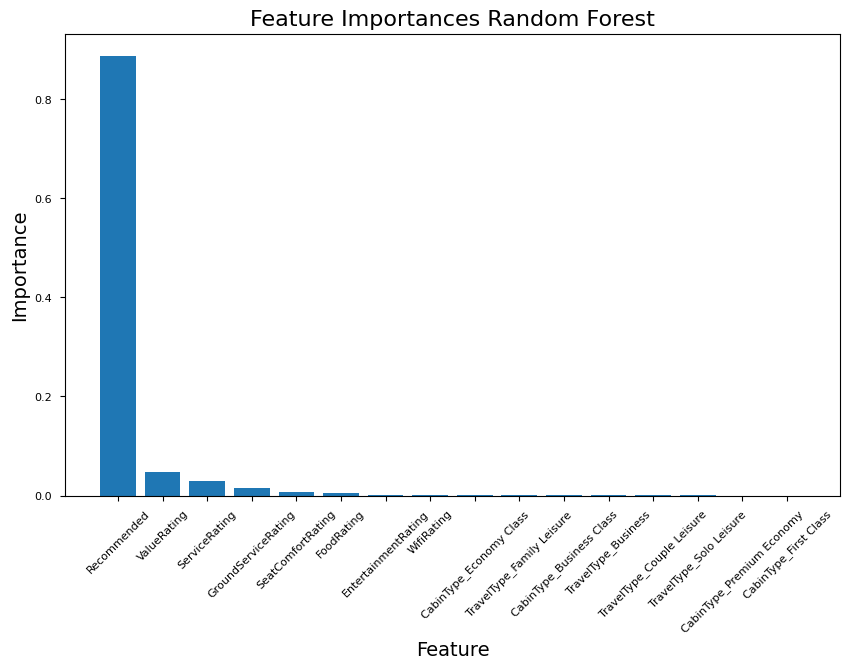

In [25]:
best_tree = grid_search_rf.best_estimator_
importances = best_tree.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
top_features = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), top_features, rotation=45)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Importance',fontsize=14)
plt.title('Feature Importances Random Forest',fontsize=16)
plt.show()



### Boosting

In [ ]:
ada_boost = AdaBoostRegressor()
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Create GridSearchCV instance for AdaBoost
grid_search_ada = GridSearchCV(ada_boost, param_grid_ada, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_ada.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_ada = grid_search_ada.best_params_
best_estimator_ada = grid_search_ada.best_estimator_

# Make predictions on the test set
y_pred_ada = best_estimator_ada.predict(X_test)

# Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred_ada)
print(f"Best Parameters for AdaBoost Regression: {best_params_ada}")
print(f"Mean Squared Error on Test Set: {mse_ada}")

## Neural Network

In [51]:
scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.array.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.array.reshape(-1, 1)).flatten()

def build_model(input_shape):
    model = models.Sequential()

    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])

    return model

input_dim = X_train.shape[1]
print(input_dim)
model = build_model((input_dim,))
model.summary()

16
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2993 (11.69 KB)
Trainable params: 2993 (11.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.fit(X_train,y_train_scaled,epochs=10,validation_data=(X_test,y_test_scaled))

Epoch 1/10
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 2/10
2279/2279 [==============================] - 6s 3ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 3/10
2279/2279 [==============================] - 7s 3ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 4/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 5/10
2279/2279 [==============================] - 5s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 6/10
2279/2279 [==============================] - 4s 2ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 7/10
2279/

In [53]:
preds = model.predict(X_test)
scaled_pred = scaler.inverse_transform(preds)

570/570 [==============================] - 1s 1ms/step


In [54]:
mean_squared_error(y_test,scaled_pred)

0.8767364619793038

In [55]:
train_pred = model.predict(X_train)
scaled_train = scaler.inverse_transform(train_pred)
mean_squared_error(y_train,scaled_train)

2279/2279 [==============================] - 2s 1ms/step


0.8614133377930776